In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
original_data = pd.read_csv("dkmacovid_train.csv")

In [ ]:
original_data.head()

,Day,State ID,State,Lat,Long_,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,Resident Population 2020 Census,Population Density 2020 Census,Density Rank 2020 Census,SexRatio,Confirmed,Deaths,Recovered
0,2,1,Alabama,32.3182,-86.9023,162449,7535.061394,1891468,1.318688,38576.31315,"5,024,279",99.2,29,94,True,False,False
1,2,2,Alaska,61.3707,-152.4044,40421,6534.252848,1290349,0.449781,176386.82510,"733,391",1.3,52,109,True,True,False
2,2,3,Arizona,33.7298,-111.4312,452222,7407.212013,5218721,1.680608,39916.14181,"7,151,502",62.9,35,99,True,True,True
3,2,4,Arkansas,34.9697,-92.3731,24012,7669.219075,2079788,1.611203,68917.26567,"3,011,524",57.9,36,96,True,True,True
4,2,5,California,36.1162,-119.6816,2362015,6045.109130,33391442,1.111215,84509.14544,"39,538,223",253.7,13,99,True,True,False


# Data Preprocessing

Removing comma and converting Resident Population 2020 Census,Population Density 2020 Census columns to numeric type

In [ ]:
cols=['Resident Population 2020 Census','Population Density 2020 Census']
original_data[cols] = original_data[cols].replace(',', '',regex=True)
original_data['Resident Population 2020 Census'] = pd.to_numeric(original_data['Resident Population 2020 Census'])
original_data['Population Density 2020 Census'] = pd.to_numeric(original_data['Population Density 2020 Census'])
original_data

,Day,State ID,State,Lat,Long_,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,Resident Population 2020 Census,Population Density 2020 Census,Density Rank 2020 Census,SexRatio,Confirmed,Deaths,Recovered
0,2,1,Alabama,32.3182,-86.9023,162449,7535.061394,1891468,1.318688,38576.31315,5024279,99.2,29,94,True,False,False
1,2,2,Alaska,61.3707,-152.4044,40421,6534.252848,1290349,0.449781,176386.82510,733391,1.3,52,109,True,True,False
2,2,3,Arizona,33.7298,-111.4312,452222,7407.212013,5218721,1.680608,39916.14181,7151502,62.9,35,99,True,True,True
3,2,4,Arkansas,34.9697,-92.3731,24012,7669.219075,2079788,1.611203,68917.26567,3011524,57.9,36,96,True,True,True
4,2,5,California,36.1162,-119.6816,2362015,6045.109130,33391442,1.111215,84509.14544,39538223,253.7,13,99,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,31,46,Vermont,44.0459,-72.7107,3537,1917.501751,897351,1.454242,143808.78510,643077,69.8,33,97,True,True,True
1376,31,47,Virginia,37.7693,-78.1700,457993,5913.864172,5234155,1.280560,61322.04732,8631393,218.6,16,97,True,True,True
1377,31,49,West Virginia,38.4912,-80.9545,21195,6751.734093,1945579,1.672713,108561.35130,1793716,74.6,31,98,True,True,True
1378,31,50,Wisconsin,44.2685,-89.6165,68537,10169.973590,6177575,1.086567,106099.52810,5893718,108.8,27,99,True,True,True


In [ ]:
Original_data_copy = original_data

Z-score Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Original_data_copy.iloc[:, 3:14] = sc.fit_transform(Original_data_copy.iloc[:, 3:14])
Original_data_copy

,Day,State ID,State,Lat,Long_,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,Resident Population 2020 Census,Population Density 2020 Census,Density Rank 2020 Census,SexRatio,Confirmed,Deaths,Recovered
0,2,1,Alabama,-1.178670,0.304586,-0.200701,0.144028,-0.483568,-0.476902,-1.302217,-0.128626,-0.217091,0.118788,-1.168679,True,False,False
1,2,2,Alaska,3.608919,-3.033032,-0.449116,-0.290315,-0.569578,-1.800519,2.071905,-0.754447,-0.276853,1.614954,3.492526,True,True,False
2,2,3,Arizona,-0.946051,-0.945268,0.389194,0.088543,-0.007494,0.074416,-1.269412,0.181627,-0.239250,0.509092,0.385056,True,True,True
3,2,4,Arkansas,-0.741727,0.025825,-0.482520,0.202252,-0.456622,-0.031311,-0.559356,-0.422184,-0.242302,0.574143,-0.547185,True,True,True
4,2,5,California,-0.552794,-1.365662,4.276989,-0.502599,4.023547,-0.792949,-0.177608,4.905194,-0.122779,-0.922023,0.385056,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,31,46,Vermont,0.753949,1.027710,-0.524201,-2.293948,-0.625809,-0.270412,1.274271,-0.767619,-0.235038,0.378991,-0.236438,True,True,True
1376,31,47,Virginia,-0.280378,0.749535,0.400942,-0.559558,-0.005286,-0.534982,-0.745315,0.397468,-0.144206,-0.726871,-0.236438,True,True,True
1377,31,49,West Virginia,-0.161416,0.607653,-0.488254,-0.195930,-0.475825,0.062389,0.411281,-0.599800,-0.232108,0.248890,0.074309,True,True,True
1378,31,50,Wisconsin,0.790631,0.166286,-0.391879,1.287559,0.129702,-0.830494,0.351006,-0.001819,-0.211231,-0.011313,0.385056,True,True,True


Histplot

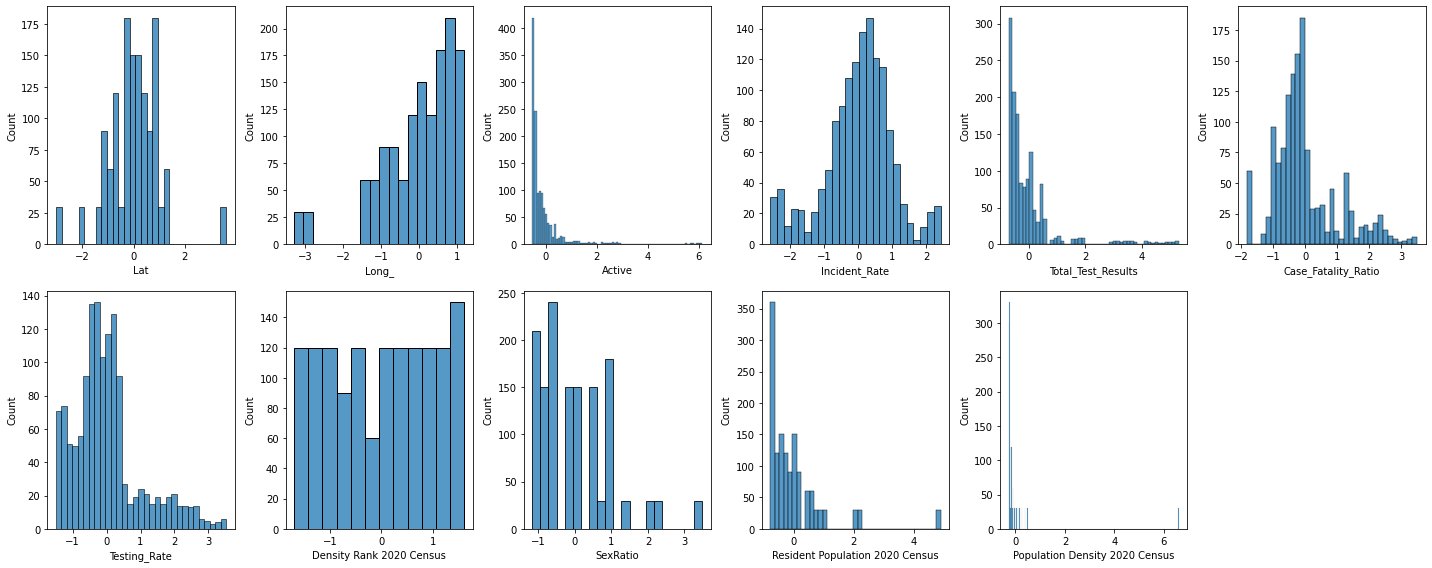

In [ ]:
plot_cols=['Lat','Long_','Active','Incident_Rate','Total_Test_Results','Case_Fatality_Ratio','Testing_Rate','Density Rank 2020 Census','SexRatio',
           'Resident Population 2020 Census','Population Density 2020 Census']

a = 2  # number of rows
b = 6  # number of columns
c = 1  # initialize plot counter

fig=plt.figure(figsize=(20,8))
  
for col in plot_cols:
    plt.subplot(a, b, c)
    plt.tight_layout()
    sns.histplot(data=Original_data_copy[col])
    c = c + 1
plt.show()

Outlier Detection-Boxplot

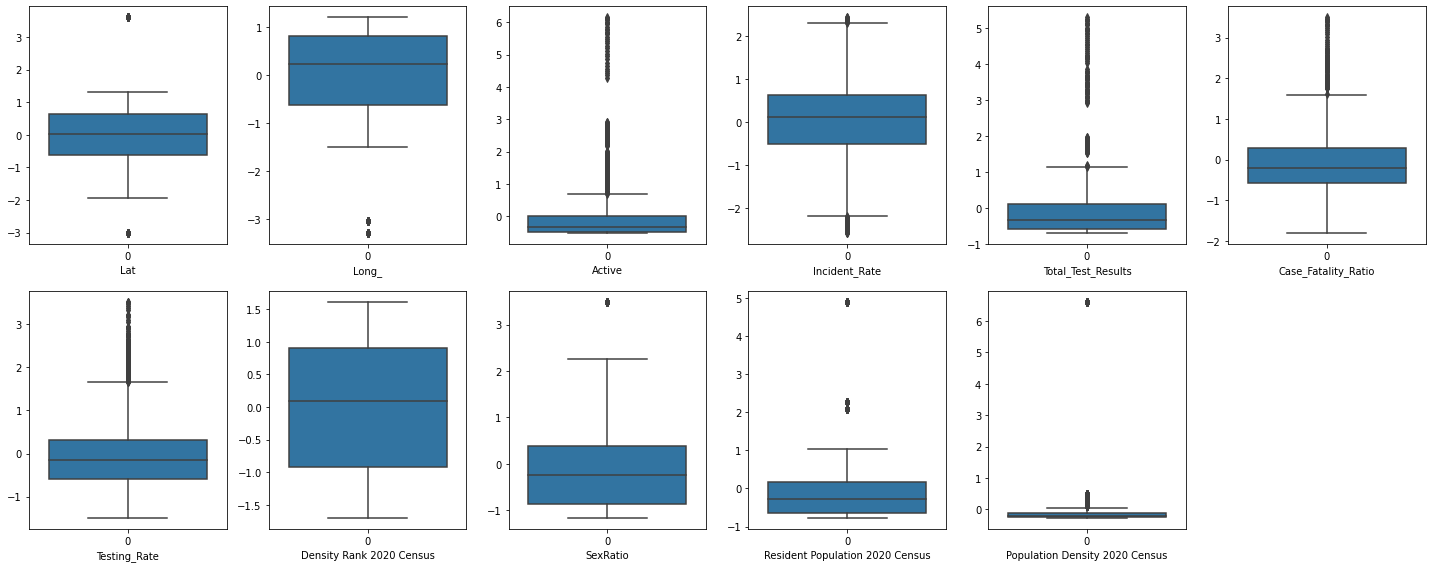

In [ ]:
a = 2  # number of rows
b = 6  # number of columns
c = 1  # initialize plot counter

fig=plt.figure(figsize=(20,8))
  
for col in plot_cols:
    plt.subplot(a, b, c)
    plt.tight_layout()
    sns.boxplot(data=Original_data_copy[col])
    plt.xlabel(col)
    c = c + 1
plt.show()

Outlier Removal using z-score

In [ ]:
threshold = 3

for col in plot_cols:
  Original_data_copy['outliers'] = np.where((Original_data_copy[col] - threshold > 0), True, np.where(Original_data_copy[col] + threshold < 0, True, False))
  Original_data_copy.drop(Original_data_copy[Original_data_copy['outliers'] == True].index,inplace=True)
  
Original_data_copy.shape

(1209, 18)

# PCA

In [ ]:
original_data.count()

Day                                1209
State ID                           1209
State                              1209
Lat                                1209
Long_                              1209
Active                             1209
Incident_Rate                      1209
Total_Test_Results                 1209
Case_Fatality_Ratio                1209
Testing_Rate                       1209
Resident Population 2020 Census    1209
Population Density 2020 Census     1209
Density Rank 2020 Census           1209
SexRatio                           1209
Confirmed                          1209
Deaths                             1209
Recovered                          1209
outliers                           1209
dtype: int64

In [ ]:
original_data.nunique()

Day                                  30
State ID                             41
State                                41
Lat                                  41
Long_                                41
Active                             1162
Incident_Rate                      1159
Total_Test_Results                 1127
Case_Fatality_Ratio                1159
Testing_Rate                       1127
Resident Population 2020 Census      41
Population Density 2020 Census       41
Density Rank 2020 Census             41
SexRatio                             11
Confirmed                             2
Deaths                                2
Recovered                             2
outliers                              1
dtype: int64

[CM2] We can observe from here that only columns from Active to Testing Rate show variation and hence these 5 columns are extracted as the subset features to perform PCA and LDA

In [ ]:
Extracted_fetures = Original_data_copy.iloc[:, 5:10]
Extracted_fetures

,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate
0,-0.200701,0.144028,-0.483568,-0.476902,-1.302217
2,0.389194,0.088543,-0.007494,0.074416,-1.269412
3,-0.482520,0.202252,-0.456622,-0.031311,-0.559356
5,0.111972,-0.570048,-0.113944,-0.279565,-0.344232
6,-0.176737,-0.811853,-0.127020,2.401070,0.763460
...,...,...,...,...,...
1375,-0.524201,-2.293948,-0.625809,-0.270412,1.274271
1376,0.400942,-0.559558,-0.005286,-0.534982,-0.745315
1377,-0.488254,-0.195930,-0.475825,0.062389,0.411281
1378,-0.391879,1.287559,0.129702,-0.830494,0.351006


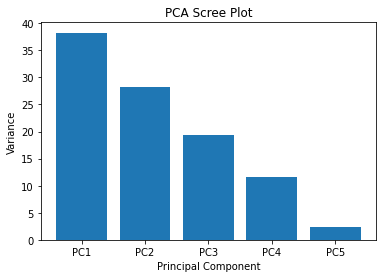

In [ ]:
pca = PCA(n_components = 5)
pca_features = pca.fit_transform(Extracted_fetures)
percent_variance = np.round(pca.explained_variance_ratio_*100, decimals=2)
columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5']
plt.bar(x= range(1,6), height=percent_variance, tick_label=columns)
plt.xlabel('Principal Component')
plt.ylabel('Variance')
plt.title('PCA Scree Plot')
plt.show()

In [ ]:
PC=pd.DataFrame(pca_features, columns=columns)
PC

,PC1,PC2,PC3,PC4,PC5
0,-0.844496,-0.847625,0.178617,-0.408551,-0.052795
1,-0.326309,-0.767683,0.916446,-0.164935,-0.116661
2,-0.307809,-0.166535,-0.075952,-0.518387,0.018939
3,0.211685,-0.664040,-0.082940,0.285905,-0.085389
4,2.477701,0.620401,0.397241,-0.929413,-0.335571
...,...,...,...,...,...
1204,1.835369,-0.712662,-1.956137,0.564301,-0.267339
1205,-0.082419,-1.016318,0.187673,0.478324,-0.111322
1206,0.395850,0.235737,-0.621752,-0.143968,-0.102793
1207,-1.000832,0.999990,-0.193200,0.468035,0.430645


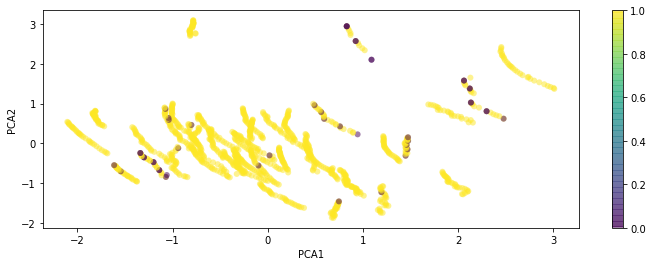

In [ ]:
# plot by Confirmed
y = original_data.iloc[:, 14:17]
pca = PCA(n_components = 2)
pca_features = pca.fit_transform(Extracted_fetures)

figure(figsize=(12,4))
plt.scatter(pca_features[:, 0], pca_features[:, 1],
            c=y["Confirmed"], edgecolor='none', alpha=0.5,)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar();

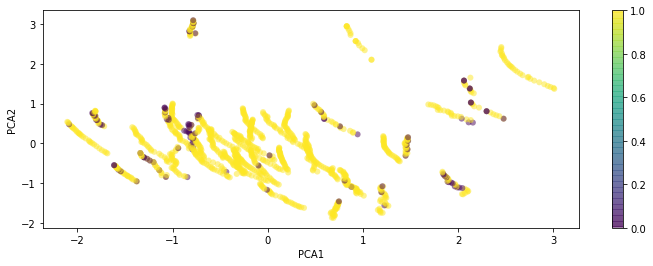

In [ ]:
# plot by deaths
y = original_data.iloc[:, 14:17]

pca = PCA(n_components = 2)
pca_features = pca.fit_transform(Extracted_fetures)
figure(figsize=(12,4))
plt.scatter(pca_features[:, 0], pca_features[:, 1],
            c=y["Deaths"], edgecolor='none', alpha=0.5,)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar();

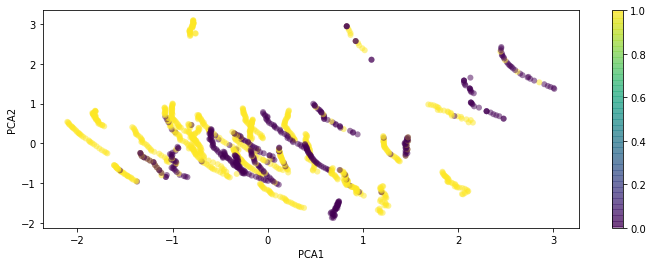

In [ ]:
# plot by Recovered
y = original_data.iloc[:, 14:17]

pca = PCA(n_components = 2)
pca_features = pca.fit_transform(Extracted_fetures)
figure(figsize=(12,4))
plt.scatter(pca_features[:, 0], pca_features[:, 1],
            c=y["Recovered"], edgecolor='none', alpha=0.5,)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar();

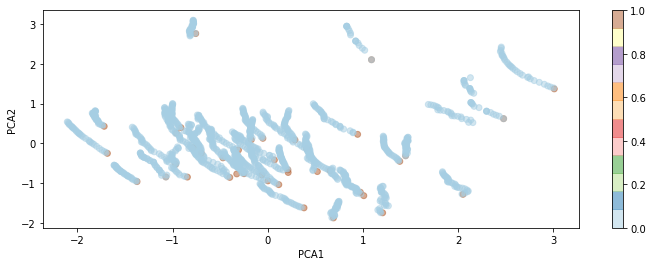

In [ ]:
# plot for first day (Day == 2)
y = original_data.iloc[:, 14:17]

pca = PCA(n_components = 2)
pca_features = pca.fit_transform(Extracted_fetures)

figure(figsize=(12,4))
plt.scatter(pca_features[:, 0], pca_features[:, 1],
            c=Original_data_copy["Day"] == 2, edgecolor='face', alpha=0.5,
            cmap='Paired')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar();

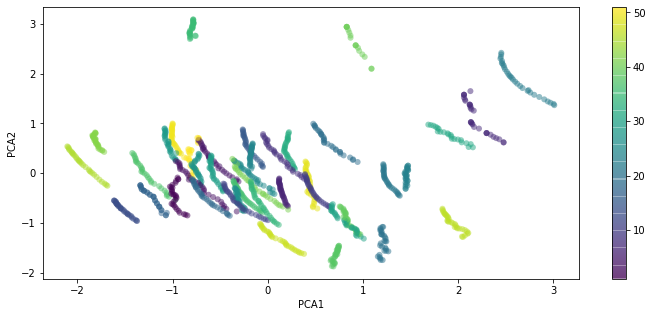

In [ ]:
# plot by State ID
y = original_data.iloc[:, 14:17]

pca = PCA(n_components = 2)
pca_features = pca.fit_transform(Extracted_fetures)

figure(figsize=(12,5))
plt.scatter(pca_features[:, 0], pca_features[:, 1],
            c=Original_data_copy["State ID"], edgecolor='none', alpha=0.5,)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


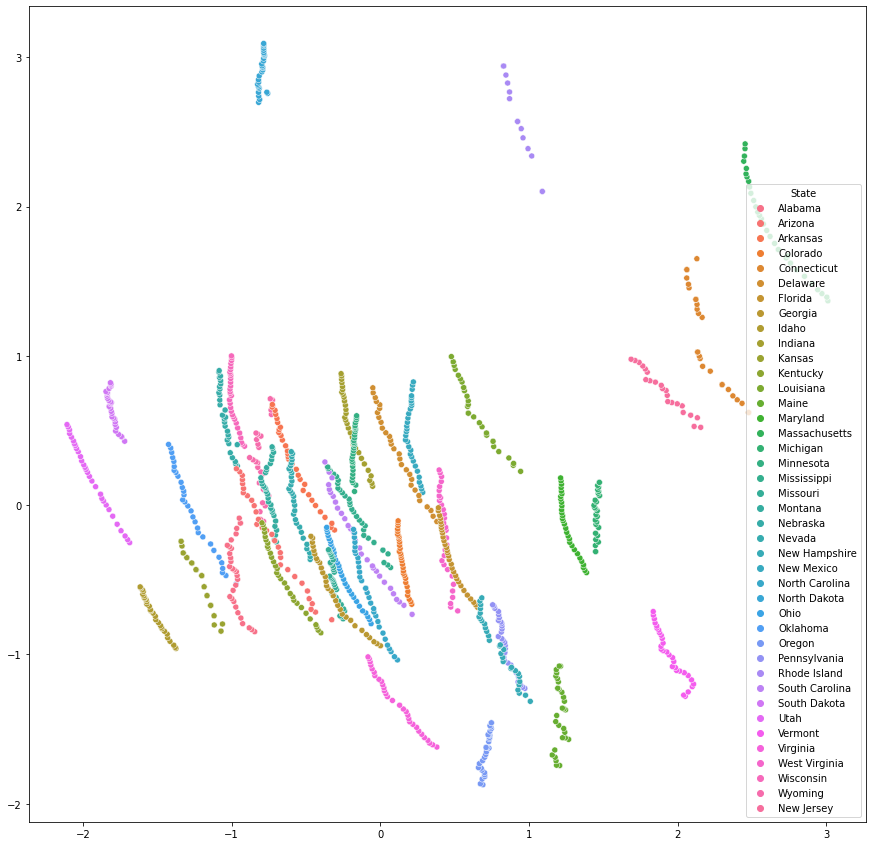

In [ ]:
# plot by State
y = original_data.iloc[:, 14:17]

pca = PCA(n_components = 2)
pca_features = pca.fit_transform(Extracted_fetures)

figure(figsize=(15,15))
sns.scatterplot(pca_features[:, 0], pca_features[:, 1],hue=Original_data_copy["State"])

In [ ]:
percent_variance

array([38.26, 28.26, 19.45, 11.58,  2.45])

In [ ]:
%store pca_features

Stored 'pca_features' (ndarray)


# LDA

In [ ]:
lda = LinearDiscriminantAnalysis(n_components = 1)
lda_recovered = lda.fit_transform(Extracted_fetures,Original_data_copy.loc[:,'Recovered'])
lda_deaths = lda.fit_transform(Extracted_fetures,Original_data_copy.loc[:,'Deaths'])
lda_confirmed = lda.fit_transform(Extracted_fetures,Original_data_copy.loc[:,'Confirmed'])

In [ ]:
lda_confirmed

array([[ 0.44661636],
       [ 0.27779754],
       [-0.17238948],
       ...,
       [-0.61270518],
       [ 0.90054847],
       [-0.319791  ]])

In [ ]:
lda_deaths

array([[-0.00540373],
       [ 0.61397097],
       [-0.38198988],
       ...,
       [-0.88514553],
       [ 0.68705052],
       [-1.10775743]])

In [ ]:
lda_recovered

array([[ 0.29441841],
       [-0.91552975],
       [ 0.39450745],
       ...,
       [ 0.31641987],
       [ 1.32226117],
       [ 1.10623856]])

# Decision Trees Classifier

In [ ]:
Original_data_copy.shape

(1209, 18)

In [ ]:
y = original_data.iloc[:, 14:17]
y.shape

(1209, 3)

In [ ]:
DTbase = DecisionTreeClassifier(max_features = 'auto', random_state = 0)

param_grid = {
    'max_depth':[3, 5, 10, None],
}

DT_fit = GridSearchCV(estimator=DTbase, param_grid=param_grid, cv = 10, refit='accuracy_score')
DT_result = DT_fit.fit(Original_data_copy.iloc[:, 3:14], y)

results_df = pd.DataFrame(DT_result.cv_results_)
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006598,0.004011,0.003278,0.001948,3,{'max_depth': 3},0.702479,0.752066,0.710744,0.743802,0.735537,0.727273,0.809917,0.719008,0.809917,0.716667,0.742741,0.036459,4
1,0.005006,0.001356,0.002257,0.000424,5,{'max_depth': 5},0.719008,0.776860,0.768595,0.826446,0.842975,0.743802,0.851240,0.776860,0.826446,0.766667,0.789890,0.042113,2
2,0.005227,0.000474,0.002157,0.000245,10,{'max_depth': 10},0.776860,0.867769,0.793388,0.851240,0.892562,0.793388,0.851240,0.809917,0.884298,0.750000,0.827066,0.046274,1
3,0.005929,0.000966,0.002985,0.002311,None,{'max_depth': None},0.760331,0.801653,0.768595,0.826446,0.793388,0.826446,0.809917,0.809917,0.752066,0.700000,0.784876,0.037699,3


Text(0, 0.5, 'Mean Accuracy')

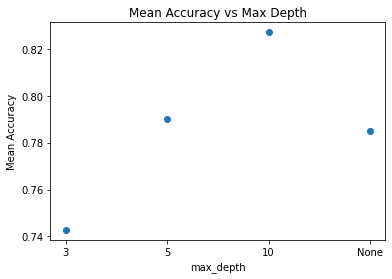

In [ ]:
plt.scatter(['3', '5', '10', 'None'], results_df["mean_test_score"])
plt.title('Mean Accuracy vs Max Depth')
plt.xlabel('max_depth')
plt.ylabel('Mean Accuracy')

In [ ]:
clf = DT_result.best_estimator_

In [ ]:
pip install graphviz

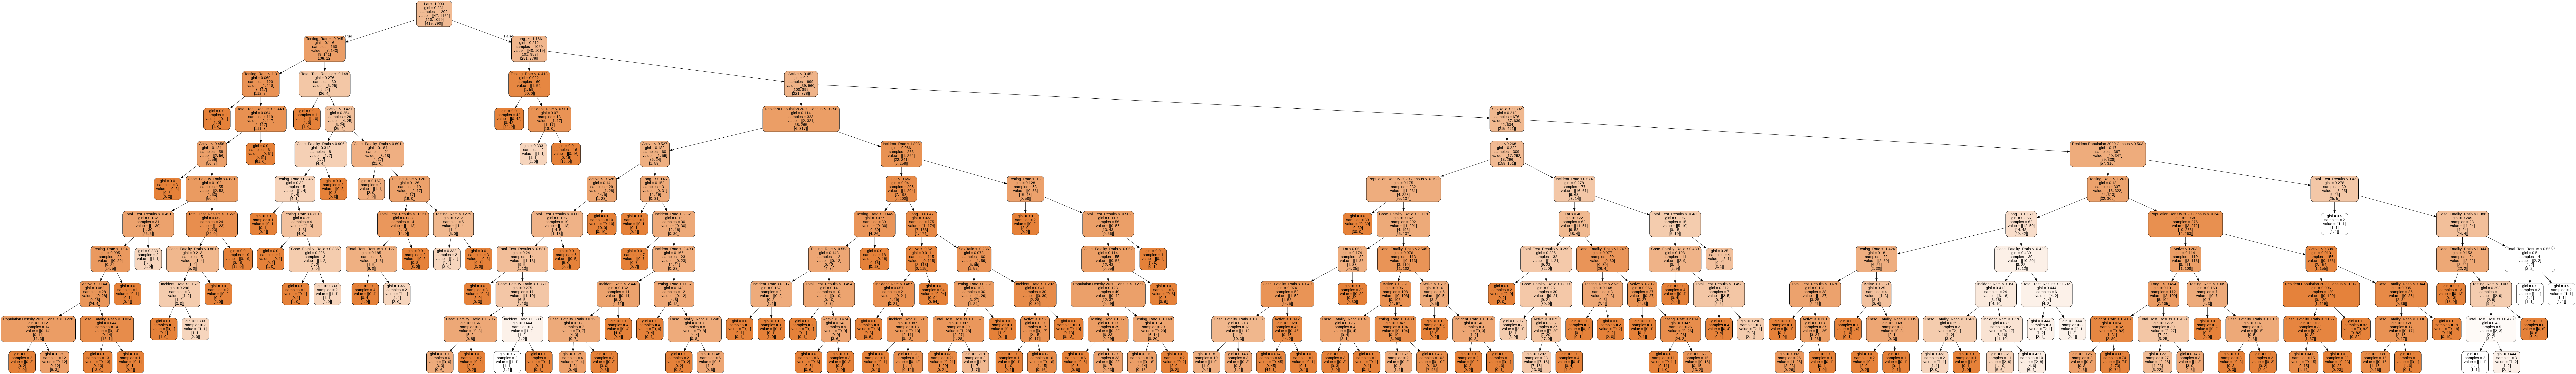

In [ ]:
import graphviz 

dot_data = tree.export_graphviz(clf, out_file="tree_dot.dot",
                     feature_names=Original_data_copy.iloc[:, 3:14].columns,
                     class_names=y["Confirmed"].unique(),  
                     filled=True, rounded=True,  
                     special_characters=True)  
 
import pydot
from IPython.display import Image

(graph,) = pydot.graph_from_dot_file("tree_dot.dot")
graph.write_png('dt.png')
Image(filename='dt.png')

# Random Forest Classifier

In [ ]:
DTbase = RandomForestClassifier(max_features = 'auto', random_state = 0)
param_grid = {
    'n_estimators' : [5, 10, 50, 150, 200],
    'max_depth': [3, 5, 10, None],
}

DT_fit = GridSearchCV(estimator=DTbase, param_grid=param_grid, cv = 10, refit='accuracy_score')
DT_result = DT_fit.fit(Original_data_copy.iloc[:, 3:14], y)

results_df = pd.DataFrame(DT_result.cv_results_)
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.019529,0.005799,0.004067,0.001120,3,5,"{'max_depth': 3, 'n_estimators': 5}",0.752066,0.793388,0.735537,0.809917,0.801653,0.702479,0.809917,0.743802,0.785124,0.791667,0.772555,0.034819,20
1,0.024525,0.002636,0.003528,0.000133,3,10,"{'max_depth': 3, 'n_estimators': 10}",0.785124,0.826446,0.768595,0.859504,0.760331,0.760331,0.834711,0.785124,0.826446,0.791667,0.799828,0.032848,19
2,0.106547,0.003956,0.008470,0.000418,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.809917,0.801653,0.768595,0.809917,0.826446,0.760331,0.859504,0.801653,0.818182,0.766667,0.802287,0.028968,18
3,0.319725,0.013200,0.022045,0.002907,3,150,"{'max_depth': 3, 'n_estimators': 150}",0.793388,0.801653,0.785124,0.809917,0.826446,0.760331,0.859504,0.793388,0.834711,0.775000,0.803946,0.028103,16
4,0.419998,0.009522,0.027459,0.002725,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.793388,0.801653,0.785124,0.809917,0.826446,0.760331,0.859504,0.793388,0.834711,0.775000,0.803946,0.028103,16
5,0.016492,0.001512,0.003243,0.000532,5,5,"{'max_depth': 5, 'n_estimators': 5}",0.793388,0.801653,0.818182,0.834711,0.842975,0.793388,0.859504,0.801653,0.851240,0.750000,0.814669,0.031606,15
6,0.028631,0.001669,0.003798,0.000343,5,10,"{'max_depth': 5, 'n_estimators': 10}",0.818182,0.801653,0.793388,0.842975,0.826446,0.776860,0.859504,0.801653,0.867769,0.766667,0.815510,0.032094,14
7,0.120552,0.004568,0.009051,0.001401,5,50,"{'max_depth': 5, 'n_estimators': 50}",0.785124,0.809917,0.793388,0.867769,0.859504,0.801653,0.909091,0.809917,0.892562,0.800000,0.832893,0.042717,5
8,0.357939,0.008693,0.021652,0.000977,5,150,"{'max_depth': 5, 'n_estimators': 150}",0.826446,0.851240,0.818182,0.867769,0.867769,0.801653,0.909091,0.793388,0.876033,0.800000,0.841157,0.036919,1
9,0.478543,0.009305,0.027675,0.001229,5,200,"{'max_depth': 5, 'n_estimators': 200}",0.809917,0.851240,0.818182,0.867769,0.859504,0.776860,0.909091,0.793388,0.859504,0.783333,0.832879,0.040836,6


In [ ]:
import numpy as np
data = np.array(results_df["mean_test_score"])
data

array([0.7725551 , 0.79982782, 0.8022865 , 0.80394628, 0.80394628,
       0.81466942, 0.81550964, 0.83289256, 0.84115702, 0.83287879,
       0.82624656, 0.83367769, 0.83121901, 0.83452479, 0.83535124,
       0.82048209, 0.82129477, 0.81797521, 0.82128099, 0.81962121])

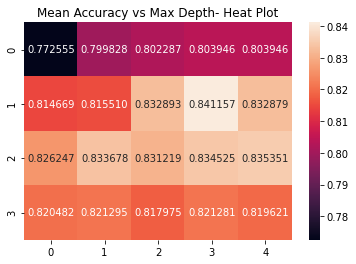

In [ ]:
data = data.reshape(4,5)
import seaborn as sns
plt.title('Mean Accuracy vs Max Depth- Heat Plot')
ax = sns.heatmap(data, annot=True, fmt='f')


In [ ]:
# RF with PCA 
DTbase = RandomForestClassifier(max_features = 'auto', random_state = 0)
param_grid = {
    'n_estimators' : [5, 10, 50, 150, 200],
    'max_depth': [3, 5, 10, None],
}

DT_fit = GridSearchCV(estimator=DTbase, param_grid=param_grid, cv = 10, refit='accuracy_score')
DT_result = DT_fit.fit(pca_features, y)

results_df = pd.DataFrame(DT_result.cv_results_)
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012172,0.001698,0.002293,0.000071,3,5,"{'max_depth': 3, 'n_estimators': 5}",0.586777,0.636364,0.570248,0.636364,0.661157,0.553719,0.685950,0.619835,0.652893,0.566667,0.616997,0.042880,20
1,0.020472,0.000378,0.002891,0.000086,3,10,"{'max_depth': 3, 'n_estimators': 10}",0.586777,0.652893,0.578512,0.652893,0.661157,0.553719,0.685950,0.619835,0.652893,0.566667,0.621129,0.043976,19
2,0.096280,0.003998,0.008180,0.000916,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.619835,0.677686,0.578512,0.628099,0.661157,0.553719,0.685950,0.619835,0.661157,0.558333,0.624428,0.045664,17
3,0.284520,0.010905,0.022548,0.002692,3,150,"{'max_depth': 3, 'n_estimators': 150}",0.603306,0.677686,0.603306,0.628099,0.661157,0.553719,0.685950,0.619835,0.652893,0.566667,0.625262,0.042470,16
4,0.370567,0.005654,0.028700,0.003380,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.603306,0.677686,0.603306,0.628099,0.661157,0.553719,0.685950,0.619835,0.652893,0.558333,0.624428,0.043676,17
5,0.013525,0.000709,0.002515,0.000324,5,5,"{'max_depth': 5, 'n_estimators': 5}",0.644628,0.669421,0.611570,0.735537,0.735537,0.586777,0.710744,0.619835,0.644628,0.566667,0.652534,0.056588,14
6,0.023922,0.001899,0.003088,0.000185,5,10,"{'max_depth': 5, 'n_estimators': 10}",0.636364,0.669421,0.611570,0.735537,0.727273,0.578512,0.743802,0.644628,0.669421,0.583333,0.659986,0.057524,12
7,0.103060,0.002578,0.008581,0.002122,5,50,"{'max_depth': 5, 'n_estimators': 50}",0.611570,0.677686,0.669421,0.727273,0.735537,0.595041,0.727273,0.644628,0.694215,0.616667,0.669931,0.049012,10
8,0.303280,0.003832,0.020851,0.001100,5,150,"{'max_depth': 5, 'n_estimators': 150}",0.611570,0.677686,0.628099,0.743802,0.727273,0.603306,0.685950,0.669421,0.702479,0.583333,0.663292,0.051744,11
9,0.403441,0.005435,0.028412,0.002920,5,200,"{'max_depth': 5, 'n_estimators': 200}",0.619835,0.677686,0.628099,0.727273,0.727273,0.603306,0.677686,0.652893,0.685950,0.583333,0.658333,0.047006,13


In [ ]:
import numpy as np
data = np.array(results_df["mean_test_score"])
data

array([0.61699725, 0.62112948, 0.62442837, 0.62526171, 0.62442837,
       0.65253444, 0.65998623, 0.66993113, 0.66329201, 0.65833333,
       0.65172865, 0.70301653, 0.69887741, 0.69883609, 0.69884986,
       0.68152893, 0.69556474, 0.70795455, 0.71126033, 0.70960055])

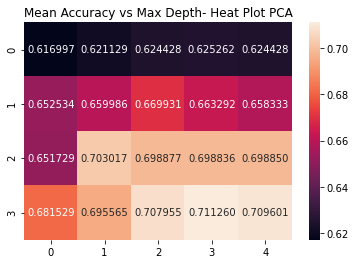

In [ ]:
data = data.reshape(4,5)
import seaborn as sns
plt.title('Mean Accuracy vs Max Depth- Heat Plot PCA')
ax = sns.heatmap(data, annot=True, fmt='f')

# Gradient Boosting

In [ ]:
DTbase = GradientBoostingClassifier(max_features = 'auto', random_state = 0)
param_grid = {
    'n_estimators' : [5, 10, 50, 150, 200],
}

DT_fit = GridSearchCV(estimator=DTbase, param_grid=param_grid, cv = 10, refit='accuracy_score')
DT_result = DT_fit.fit(Original_data_copy.iloc[:, 3:14], y["Confirmed"])

results_df = pd.DataFrame(DT_result.cv_results_)
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.016360,0.001018,0.001350,0.000046,5,{'n_estimators': 5},0.966942,0.966942,0.958678,0.958678,0.958678,0.958678,0.958678,0.958678,0.958678,0.966667,0.961129,0.003746,2
1,0.031213,0.001908,0.001413,0.000059,10,{'n_estimators': 10},0.975207,0.966942,0.958678,0.958678,0.958678,0.958678,0.958678,0.958678,0.958678,0.966667,0.961956,0.005458,1
2,0.146180,0.004299,0.001570,0.000238,50,{'n_estimators': 50},0.975207,0.975207,0.958678,0.966942,0.958678,0.958678,0.958678,0.950413,0.958678,0.925000,0.958616,0.013480,3
3,0.428167,0.008645,0.001727,0.000047,150,{'n_estimators': 150},0.958678,0.975207,0.950413,0.958678,0.950413,0.958678,0.958678,0.950413,0.958678,0.916667,0.953650,0.014108,4
4,0.571114,0.004748,0.001853,0.000053,200,{'n_estimators': 200},0.958678,0.975207,0.950413,0.958678,0.950413,0.958678,0.950413,0.950413,0.958678,0.916667,0.952824,0.014031,5


Text(0, 0.5, 'Mean Accuracy')

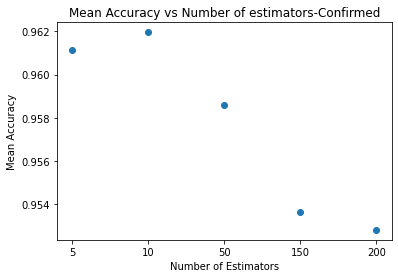

In [ ]:
plt.scatter(['5', '10', '50', '150', '200',], results_df["mean_test_score"])
plt.title('Mean Accuracy vs Number of estimators-Confirmed')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Accuracy')

In [ ]:
DTbase = GradientBoostingClassifier(max_features = 'auto', random_state = 0)
param_grid = {
    'n_estimators' : [5, 10, 50, 150, 200],
}

DT_fit = GridSearchCV(estimator=DTbase, param_grid=param_grid, cv = 10, refit='accuracy_score')
DT_result = DT_fit.fit(Original_data_copy.iloc[:, 3:14], y["Deaths"])

results_df = pd.DataFrame(DT_result.cv_results_)
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.017736,0.002252,0.001561,0.000226,5,{'n_estimators': 5},0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.908333,0.909015,0.000227,3
1,0.033351,0.002108,0.001612,0.000305,10,{'n_estimators': 10},0.925620,0.933884,0.909091,0.917355,0.925620,0.909091,0.925620,0.917355,0.925620,0.925000,0.921426,0.007588,1
2,0.144817,0.004921,0.001560,0.000181,50,{'n_estimators': 50},0.917355,0.925620,0.909091,0.917355,0.925620,0.909091,0.900826,0.917355,0.909091,0.866667,0.909807,0.016169,2
3,0.432109,0.007906,0.001819,0.000128,150,{'n_estimators': 150},0.917355,0.917355,0.892562,0.892562,0.900826,0.909091,0.909091,0.909091,0.884298,0.866667,0.899890,0.015229,4
4,0.566075,0.006108,0.001862,0.000033,200,{'n_estimators': 200},0.917355,0.917355,0.876033,0.892562,0.917355,0.909091,0.909091,0.909091,0.884298,0.866667,0.899890,0.017717,4


Text(0, 0.5, 'Mean Accuracy')

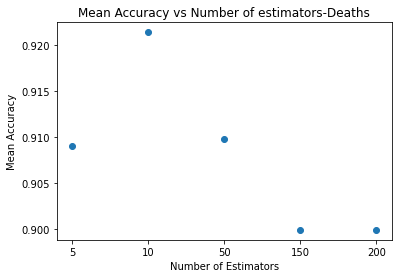

In [ ]:
plt.scatter(['5', '10', '50', '150', '200',], results_df["mean_test_score"])
plt.title('Mean Accuracy vs Number of estimators-Deaths')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Accuracy')

In [ ]:
DTbase = GradientBoostingClassifier(max_features = 'auto', random_state = 0)
param_grid = {
    'n_estimators' : [5, 10, 50, 150, 200],
}

DT_fit = GridSearchCV(estimator=DTbase, param_grid=param_grid, cv = 10, refit='accuracy_score')
DT_result = DT_fit.fit(Original_data_copy.iloc[:, 3:14], y["Recovered"])

results_df = pd.DataFrame(DT_result.cv_results_)
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015988,0.000747,0.001374,0.000057,5,{'n_estimators': 5},0.801653,0.834711,0.818182,0.801653,0.859504,0.776860,0.876033,0.842975,0.801653,0.825000,0.823822,0.028632,5
1,0.030716,0.002635,0.001625,0.000681,10,{'n_estimators': 10},0.842975,0.834711,0.867769,0.859504,0.876033,0.851240,0.909091,0.892562,0.900826,0.891667,0.872638,0.024221,4
2,0.143956,0.004693,0.001644,0.000211,50,{'n_estimators': 50},0.884298,0.933884,0.933884,0.909091,0.958678,0.900826,0.958678,0.933884,0.950413,0.941667,0.930530,0.023700,2
3,0.428838,0.008787,0.001966,0.000299,150,{'n_estimators': 150},0.909091,0.933884,0.933884,0.917355,0.950413,0.900826,0.950413,0.942149,0.950413,0.925000,0.931343,0.016979,1
4,0.558135,0.006197,0.001960,0.000108,200,{'n_estimators': 200},0.909091,0.925620,0.933884,0.917355,0.950413,0.900826,0.950413,0.925620,0.942149,0.925000,0.928037,0.015713,3


Text(0, 0.5, 'Mean Accuracy')

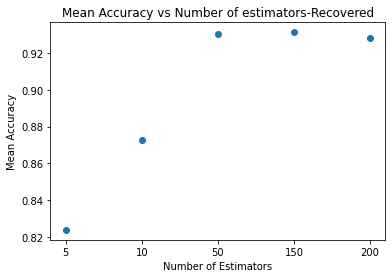

In [ ]:
plt.scatter(['5', '10', '50', '150', '200',], results_df["mean_test_score"])
plt.title('Mean Accuracy vs Number of estimators-Recovered')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Accuracy')

In [ ]:
DTbase = GradientBoostingClassifier(max_features = 'auto', random_state = 0)
param_grid = {
    'n_estimators' : [5, 10, 50, 150, 200],
}

DT_fit = GridSearchCV(estimator=DTbase, param_grid=param_grid, cv = 10, refit='accuracy_score')
DT_result = DT_fit.fit(pca_features, y['Confirmed'])

results_df = pd.DataFrame(DT_result.cv_results_)
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008063,0.000579,0.000664,0.000020,5,{'n_estimators': 5},0.958678,0.966942,0.958678,0.958678,0.958678,0.958678,0.958678,0.958678,0.958678,0.966667,0.960303,0.003251,1
1,0.014707,0.000561,0.000726,0.000032,10,{'n_estimators': 10},0.958678,0.966942,0.958678,0.950413,0.958678,0.958678,0.958678,0.958678,0.958678,0.966667,0.959477,0.004405,2
2,0.069978,0.004071,0.000841,0.000034,50,{'n_estimators': 50},0.950413,0.966942,0.958678,0.950413,0.958678,0.958678,0.958678,0.950413,0.958678,0.950000,0.956157,0.005338,3
3,0.204285,0.005189,0.001105,0.000199,150,{'n_estimators': 150},0.958678,0.975207,0.942149,0.950413,0.950413,0.958678,0.958678,0.950413,0.958678,0.925000,0.952831,0.012424,4
4,0.271090,0.006611,0.001141,0.000028,200,{'n_estimators': 200},0.958678,0.975207,0.942149,0.950413,0.942149,0.958678,0.958678,0.950413,0.942149,0.925000,0.950351,0.012924,5


Text(0, 0.5, 'Mean Accuracy')

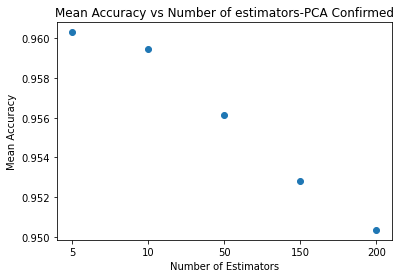

In [ ]:
plt.scatter(['5', '10', '50', '150', '200',], results_df["mean_test_score"])
plt.title('Mean Accuracy vs Number of estimators-PCA Confirmed')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Accuracy')

In [ ]:
DTbase = GradientBoostingClassifier(max_features = 'auto', random_state = 0)
param_grid = {
    'n_estimators' : [5, 10, 50, 150, 200],
}

DT_fit = GridSearchCV(estimator=DTbase, param_grid=param_grid, cv = 10, refit='accuracy_score')
DT_result = DT_fit.fit(pca_features, y['Deaths'])

results_df = pd.DataFrame(DT_result.cv_results_)
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008761,0.001287,0.000726,0.000038,5,{'n_estimators': 5},0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.908333,0.909015,0.000227,1
1,0.014644,0.000340,0.000750,0.000099,10,{'n_estimators': 10},0.909091,0.909091,0.909091,0.909091,0.909091,0.900826,0.909091,0.909091,0.909091,0.908333,0.908189,0.002464,2
2,0.068101,0.003228,0.000873,0.000111,50,{'n_estimators': 50},0.909091,0.909091,0.909091,0.900826,0.900826,0.892562,0.909091,0.925620,0.884298,0.866667,0.900716,0.015480,3
3,0.205069,0.002915,0.001073,0.000032,150,{'n_estimators': 150},0.909091,0.909091,0.900826,0.892562,0.917355,0.867769,0.876033,0.917355,0.884298,0.850000,0.892438,0.021475,4
4,0.271129,0.002183,0.001185,0.000021,200,{'n_estimators': 200},0.909091,0.892562,0.892562,0.884298,0.909091,0.876033,0.859504,0.917355,0.892562,0.841667,0.887472,0.022196,5


Text(0, 0.5, 'Mean Accuracy')

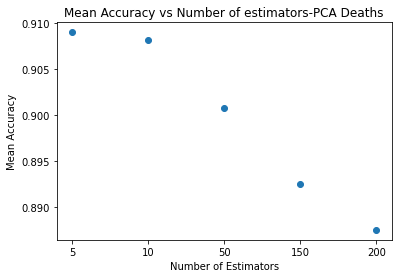

In [ ]:
plt.scatter(['5', '10', '50', '150', '200',], results_df["mean_test_score"])
plt.title('Mean Accuracy vs Number of estimators-PCA Deaths')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Accuracy')

In [ ]:
DTbase = GradientBoostingClassifier(max_features = 'auto', random_state = 0)
param_grid = {
    'n_estimators' : [5, 10, 50, 150, 200],
}

DT_fit = GridSearchCV(estimator=DTbase, param_grid=param_grid, cv = 10, refit='accuracy_score')
DT_result = DT_fit.fit(pca_features, y['Recovered'])

results_df = pd.DataFrame(DT_result.cv_results_)
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010792,0.002359,0.000864,0.000172,5,{'n_estimators': 5},0.685950,0.685950,0.702479,0.694215,0.685950,0.702479,0.685950,0.694215,0.669421,0.683333,0.688994,0.009330,5
1,0.015394,0.000383,0.000755,0.000026,10,{'n_estimators': 10},0.677686,0.694215,0.694215,0.710744,0.669421,0.719008,0.694215,0.694215,0.669421,0.683333,0.690647,0.015433,4
2,0.070484,0.003304,0.000891,0.000085,50,{'n_estimators': 50},0.702479,0.735537,0.801653,0.768595,0.760331,0.785124,0.785124,0.801653,0.793388,0.708333,0.764222,0.035099,3
3,0.207224,0.005245,0.001158,0.000102,150,{'n_estimators': 150},0.735537,0.743802,0.809917,0.760331,0.752066,0.793388,0.785124,0.785124,0.826446,0.758333,0.775007,0.028211,1
4,0.273813,0.007058,0.001227,0.000038,200,{'n_estimators': 200},0.702479,0.752066,0.809917,0.768595,0.760331,0.793388,0.785124,0.801653,0.834711,0.733333,0.774160,0.037022,2


Text(0, 0.5, 'Mean Accuracy')

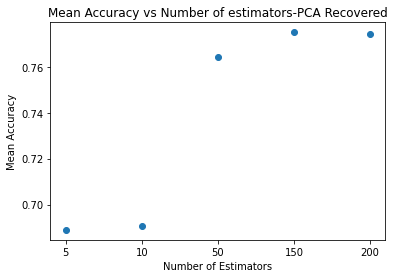

In [ ]:
plt.scatter(['5', '10', '50', '150', '200',], results_df["mean_test_score"])
plt.title('Mean Accuracy vs Number of estimators-PCA Recovered')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Accuracy')

# Naive Bayes Classifier

In [ ]:
DTbase = GaussianNB()
param_grid = {
    'var_smoothing': [1e-10, 1e-9, 1e-5, 1e-3, 1e-1]
}

DT_fit = GridSearchCV(estimator=DTbase, param_grid=param_grid, cv = 10, refit='accuracy_score')
DT_result = DT_fit.fit(Original_data_copy.iloc[:, 3:14], y["Confirmed"])

results_df = pd.DataFrame(DT_result.cv_results_)
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002076,0.000845,0.001087,0.000369,1e-10,{'var_smoothing': 1e-10},0.933884,0.900826,0.933884,0.909091,0.917355,0.933884,0.917355,0.933884,0.92562,0.908333,0.921412,0.011914,3
1,0.001706,0.000030,0.000939,0.000020,1e-09,{'var_smoothing': 1e-09},0.933884,0.900826,0.933884,0.909091,0.917355,0.933884,0.917355,0.933884,0.92562,0.908333,0.921412,0.011914,3
2,0.001686,0.000021,0.000914,0.000011,1e-05,{'var_smoothing': 1e-05},0.933884,0.900826,0.933884,0.909091,0.917355,0.933884,0.917355,0.933884,0.92562,0.908333,0.921412,0.011914,3
3,0.002129,0.001054,0.000989,0.000150,0.001,{'var_smoothing': 0.001},0.933884,0.900826,0.933884,0.909091,0.917355,0.933884,0.917355,0.933884,0.92562,0.916667,0.922245,0.011243,2
4,0.001726,0.000032,0.000933,0.000019,0.1,{'var_smoothing': 0.1},0.933884,0.900826,0.933884,0.909091,0.917355,0.933884,0.917355,0.933884,0.92562,0.933333,0.923912,0.011524,1


Text(0, 0.5, 'Mean Accuracy')

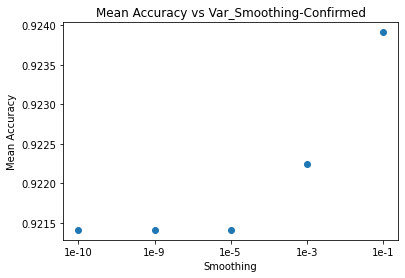

In [ ]:
plt.scatter(['1e-10', '1e-9', '1e-5', '1e-3', '1e-1'], results_df["mean_test_score"])
plt.title('Mean Accuracy vs Var_Smoothing-Confirmed')
plt.xlabel('Smoothing')
plt.ylabel('Mean Accuracy')

In [ ]:
DTbase = GaussianNB()
param_grid = {
    'var_smoothing': [1e-10, 1e-9, 1e-5, 1e-3, 1e-1]
}

DT_fit = GridSearchCV(estimator=DTbase, param_grid=param_grid, cv = 10, refit='accuracy_score')
DT_result = DT_fit.fit(Original_data_copy.iloc[:, 3:14], y["Deaths"])

results_df = pd.DataFrame(DT_result.cv_results_)
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002290,0.000819,0.001112,0.000285,1e-10,{'var_smoothing': 1e-10},0.752066,0.743802,0.735537,0.785124,0.768595,0.793388,0.752066,0.785124,0.793388,0.808333,0.771742,0.023473,3
1,0.001770,0.000070,0.000960,0.000040,1e-09,{'var_smoothing': 1e-09},0.752066,0.743802,0.735537,0.785124,0.768595,0.793388,0.752066,0.785124,0.793388,0.808333,0.771742,0.023473,3
2,0.001770,0.000089,0.000935,0.000012,1e-05,{'var_smoothing': 1e-05},0.752066,0.743802,0.735537,0.785124,0.768595,0.793388,0.752066,0.785124,0.793388,0.808333,0.771742,0.023473,3
3,0.001732,0.000015,0.000951,0.000084,0.001,{'var_smoothing': 0.001},0.752066,0.743802,0.735537,0.785124,0.768595,0.818182,0.752066,0.785124,0.793388,0.808333,0.774222,0.026714,2
4,0.001811,0.000073,0.000960,0.000013,0.1,{'var_smoothing': 0.1},0.768595,0.768595,0.768595,0.809917,0.809917,0.876033,0.785124,0.834711,0.834711,0.833333,0.808953,0.034463,1


Text(0, 0.5, 'Mean Accuracy')

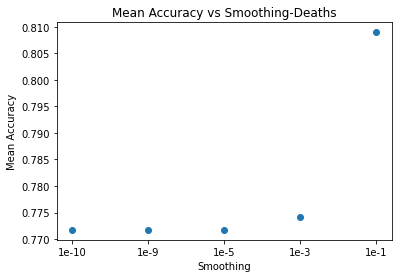

In [ ]:
plt.scatter(['1e-10', '1e-9', '1e-5', '1e-3', '1e-1'], results_df["mean_test_score"])
plt.title('Mean Accuracy vs Smoothing-Deaths')
plt.xlabel('Smoothing')
plt.ylabel('Mean Accuracy')

In [ ]:
DTbase = GaussianNB()
param_grid = {
    'var_smoothing': [1e-10, 1e-9, 1e-5, 1e-3, 1e-1]
}

DT_fit = GridSearchCV(estimator=DTbase, param_grid=param_grid, cv = 10, refit='accuracy_score')
DT_result = DT_fit.fit(Original_data_copy.iloc[:, 3:14], y["Recovered"])

results_df = pd.DataFrame(DT_result.cv_results_)
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002256,0.000699,0.001209,0.000315,1e-10,{'var_smoothing': 1e-10},0.710744,0.669421,0.719008,0.661157,0.677686,0.710744,0.644628,0.661157,0.652893,0.683333,0.679077,0.024956,3
1,0.001766,0.000060,0.000946,0.000023,1e-09,{'var_smoothing': 1e-09},0.710744,0.669421,0.719008,0.661157,0.677686,0.710744,0.644628,0.661157,0.652893,0.683333,0.679077,0.024956,3
2,0.001832,0.000107,0.000980,0.000063,1e-05,{'var_smoothing': 1e-05},0.710744,0.669421,0.719008,0.661157,0.677686,0.710744,0.644628,0.661157,0.652893,0.683333,0.679077,0.024956,3
3,0.001808,0.000083,0.000955,0.000013,0.001,{'var_smoothing': 0.001},0.710744,0.669421,0.719008,0.661157,0.677686,0.710744,0.644628,0.661157,0.652893,0.691667,0.679910,0.025222,2
4,0.001820,0.000040,0.001018,0.000066,0.1,{'var_smoothing': 0.1},0.752066,0.719008,0.743802,0.685950,0.694215,0.760331,0.694215,0.685950,0.677686,0.716667,0.712989,0.028602,1


Text(0, 0.5, 'Mean Accuracy')

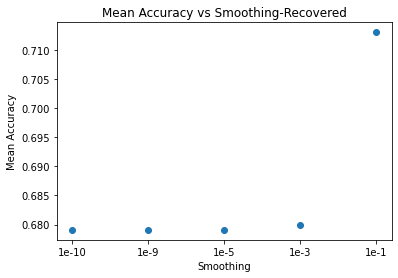

In [ ]:
plt.scatter(['1e-10', '1e-9', '1e-5', '1e-3', '1e-1'], results_df["mean_test_score"])
plt.title('Mean Accuracy vs Smoothing-Recovered')
plt.xlabel('Smoothing')
plt.ylabel('Mean Accuracy')